<h1>Covid-19 Analysis (Quantitative Modeling)</h1>

<h2>Widhya Internship</h2>

<h3>By- Vishruth Raj V.V.</h3>

In [109]:
#Import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [34]:
#Linear : y=mx + c
#Power : y = x^m
#Exponential : y = e^(m*x)
#Logarithm : y = log(m*x)

#Each of these functions can be used to model solutions but which function you use depends on your dataset.
#If absolute changes in x correspond to absolute changes in y, we use the linear function.
#If absolute changes in x correspond to relative changes in y, we use the exponential function.
#If relative changes in x correspond to relative changes in y, we use the power function.
#If relative changes in x correspond to absolute changes in y, we use the log function.
#To get a better understand of this, try to plot graphs for each of these functions and notice 
#how y changes for every 1 unit change in x.
#Coming back to predicting the spread of COVID-19. We know that this is a tricky networks. 
#One person who actually suffers from the disease, can spread it to many people and those newly affected 
#people can spread it to more people. What's happening here is that for an absolute change is x, the change
#in y would definitely be relative.

#Relative change - By what percentage (larger or smaller) did the number change from the original number?
#Absolute change - What is the difference between the original number and the new one?

#The Mathematical function that will be used to model the spread of a pendamic is : Exponential Function

In [35]:
#import data from csv file
data = pd.read_csv('covid19.csv')
data.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0


In [36]:
data.tail()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
265,266,21/03/20,Jammu and Kashmir,4,0,0,0
266,267,21/03/20,Ladakh,13,0,0,0
267,268,21/03/20,Uttar Pradesh,23,1,9,0
268,269,21/03/20,Uttarakhand,3,0,0,0
269,270,21/03/20,West Bengal,3,0,0,0


In [37]:
#group the rows by date
gdata =  data.groupby(['Date'], sort=False).sum()
gdata = pd.DataFrame(gdata)
print(gdata.columns)
print(gdata.head())

Index(['Sno', 'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths'],
      dtype='object')
          Sno  ConfirmedIndianNational  ConfirmedForeignNational  Cured  \
Date                                                                      
30/01/20    1                        1                         0      0   
31/01/20    2                        1                         0      0   
01/02/20    3                        2                         0      0   
02/02/20    4                        3                         0      0   
03/02/20    5                        3                         0      0   

          Deaths  
Date              
30/01/20       0  
31/01/20       0  
01/02/20       0  
02/02/20       0  
03/02/20       0  


In [38]:
gdata = gdata.drop('Sno',axis=1)

In [39]:
#new attribute to show total cases per day
gdata['Daily_total'] = gdata.sum(axis=1)
gdata.head()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Daily_total
Date,,,,,
30/01/20,1,0,0,0,1
31/01/20,1,0,0,0,1
01/02/20,2,0,0,0,2
02/02/20,3,0,0,0,3
03/02/20,3,0,0,0,3


In [40]:
gdata.tail()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Daily_total
Date,,,,,
17/03/20,113,24,14,3,154
18/03/20,126,25,14,3,168
19/03/20,148,25,20,4,197
20/03/20,191,32,23,4,250
21/03/20,244,39,23,4,310


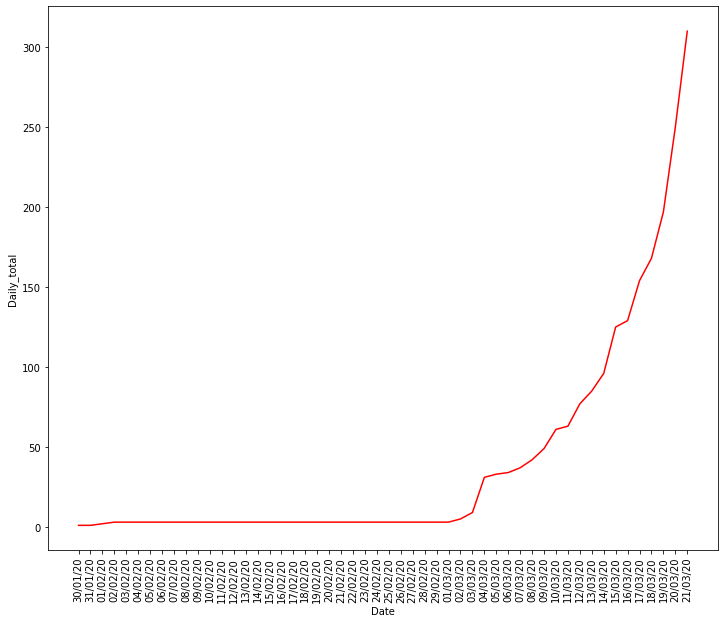

In [96]:
#Visualizng daily cases 
plt.figure(figsize = (12,10))
plt.plot(gdata['Daily_total'], color = 'red')
plt.xlabel('Date')
plt.ylabel('Daily_total')
plt.xticks(rotation = 90, fontsize = 10)
plt.show()

In [86]:
for i in range(0,gdata.shape[0]):
      if(gdata.iloc[i].name == '04/03/20'):
        print(gdata.iloc[i][-1])

31


In [93]:
rate = []
for i in range(0,gdata.shape[0]):
     if(gdata.iloc[i].name == '04/03/20'):
            for j in range(i,gdata.shape[0]-1):
                irate = (gdata.iloc[j+1]['Daily_total'] - gdata.iloc[j]['Daily_total'])/gdata.iloc[j]['Daily_total']
                rate.append(irate)
rate

[0.06451612903225806,
 0.030303030303030304,
 0.08823529411764706,
 0.13513513513513514,
 0.16666666666666666,
 0.24489795918367346,
 0.03278688524590164,
 0.2222222222222222,
 0.1038961038961039,
 0.12941176470588237,
 0.3020833333333333,
 0.032,
 0.1937984496124031,
 0.09090909090909091,
 0.17261904761904762,
 0.26903553299492383,
 0.24]

In [95]:
rate_avg = np.average(rate)
rate_avg

0.14814803793984233

In [104]:
#Predicted Forecast
p_o = 31 
r = rate_avg
t = 26  # time period in days

p_t = round(p_o*(math.exp(r*t)),0)
print(p_t)

1459.0
